### MOVIE RECOMMENDATION SYSTEM


#### IMPORTING LIBRARIES

In [70]:
import pandas as pd
import numpy as np

#### IMPORTING THE DATASET

In [71]:
credits = pd.read_csv("/Users/Anushka/OneDrive/Desktop/ML_project/tmdb_5000_credits.csv")
movies = pd.read_csv("/Users/Anushka/OneDrive/Desktop/ML_project/tmdb_5000_movies.csv")

#### DATA AUDIT

In [72]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [73]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [74]:

print("Credits:",credits.shape)
print("Movies Dataframe:",movies.shape)


Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [75]:
#1.merging the two dataframes
movies=pd.merge(movies,credits, on=['title'])
movies.shape

(4809, 23)

In [76]:
# 2.Removing duplicates

# the id column and movie_id,title and original_title columns are the same
movies.drop(columns=['id','original_title'],inplace=True)
movies.shape
#reduced shape
movies.head()
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   keywords              4809 non-null   object 
 4   original_language     4809 non-null   object 
 5   overview              4806 non-null   object 
 6   popularity            4809 non-null   float64
 7   production_companies  4809 non-null   object 
 8   production_countries  4809 non-null   object 
 9   release_date          4808 non-null   object 
 10  revenue               4809 non-null   int64  
 11  runtime               4807 non-null   float64
 12  spoken_languages      4809 non-null   object 
 13  status                4809 non-null   object 
 14  tagline               3965 non-null   object 
 15  title                

In [77]:

#3.Removing columns we don't need

# - **overview,cast,crew,title,movie_id,genres,keywords,status:** needed for recommending based on content
# - **budget,original_language,homepage,popularity,production_companies,production_countries,release_date,revenue,
#   spoken_languages,tagline,vote_count,vote_average:** not needed
# or movies=movies.drop(columns=['budget','original_language','homepage','popularity','production_companies','production_countries','release_date',
# 'revenue','spoken_languages','runtime','tagline','vote_average','vote_count'])
movies=movies[['title','movie_id','genres','keywords','overview','cast','crew']]
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Since the columns genres,keywords,cast,crew,overview are all related similar info,we will merge them under a new "tags" column.
#### 1. For merging we again repeat the pr-processing steps of checking missing  values and duplicates.
#### 2. We need to make sure these columns proper format.
#### 3. Before merging we need to make sure there's no spaces in the names in order to prevent confusion between same names for the recommender system.


#### 1. Data pre-processing:

In [78]:
#we will drop the rows having missing overviews
movies.isna().sum().sort_values(ascending=False)

#dropping rows with missing values
movies=movies.dropna()

#check for duplicates and drop them if present
movies.duplicated().sum()

movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### 2.Proper formats:

In [79]:
# i.proper format of genres:
#genres:
movies.iloc[1,2]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

#### its a list of dictionaries where for every movie we only need to extract th key:name value i.e.Action,Adventure,..

In [80]:

#helper function for converting the format
# done because of error
import ast
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [81]:

"""checking if helper function works
   convert([{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}])
    we apply the helper function to the column by:
    movies['genres'].apply(convert)
    it gives error:string indices must be integer,so we use literal_eval() of ast module"""

'checking if helper function works\n   convert([{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}])\n    we apply the helper function to the column by:\n    movies[\'genres\'].apply(convert)\n    it gives error:string indices must be integer,so we use literal_eval() of ast module'

In [82]:
#again checking if helper fucntion works
# convert([{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}])
movies['genres']=movies['genres'].apply(convert)
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,206647,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,49529,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [83]:


# ii.proper format of keywords:
movies.iloc[1,3]
#hence 1 movie has these many keywords

'[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]'

#### here we only need to keep the key,"name"'s value in the list,so we use the same helper function


In [84]:

movies['keywords']=movies['keywords'].apply(convert)
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [85]:

# iii.proper format of cast:
movies.iloc[0,5]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

#### The "cast" col contains the actors,in an ordered manner specified by the "order" tag ,so we can fiter out the top 10-15


In [86]:
#here we have many cast names in each dictionary,so we will keep the "name" key values cast of top 5 dictionaries only
#we use the same helper function but with a counter=5
def convert1(obj):
    L=[]
    counter =0
    for i in ast.literal_eval(obj):
        if counter!=10:
            L.append(i['name'])
            counter+=1
    return L

#apply the function
movies['cast']=movies['cast'].apply(convert1)
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [87]:
# iv.proper format of crew:
movies.iloc[0,6]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},


#### getting the'jobs' of the crew col to understand whom to cosider for better recommendation:

In [88]:
# The 'crew' column contains lists of dictionaries with crew details

# Convert the 'crew' column to a list of dictionaries
crew_list = movies['crew'].apply(eval).tolist()
# Flatten the list of lists into a single list of dictionaries
flat_crew_list = [item for sublist in crew_list for item in sublist]
# Extract the 'job' key from each dictionary
jobs = [crew_member['job'] for crew_member in flat_crew_list]
# Get the unique job titles
unique_jobs = set(jobs)
print(unique_jobs)

{'Lighting Artist', 'Editorial Coordinator', 'Score Engineer', 'Aerial Coordinator', 'Musician', 'Editor', 'Gaffer', 'Set Medic', 'Visual Effects Design Consultant', 'Supervising Art Director', 'Animal Coordinator', 'Sound Mixer', 'Picture Car Coordinator', 'Choreographer', 'Stand In', 'Thanks', 'Visual Effects Art Director', 'Assistant Sound Editor', 'Prosthetic Designer', 'Propmaker', 'Co-Producer', 'Mix Technician', 'Scenic Artist', 'Gun Wrangler', 'Lighting Production Assistant', 'ADR Voice Casting', 'Additional Writing', 'Makeup Designer', 'Visual Effects', 'Video Game', 'Security', 'Hair Supervisor', 'Production Supervisor', 'Assistant Art Director', 'Art Direction', 'Sound Effects Editor', 'Music Director', 'Second Unit Cinematographer', 'Assistant Property Master', 'ADR Editor', 'Original Story', 'Assistant Music Supervisor', 'Sculptor', 'Co-Executive Producer', 'Unit Manager', 'Epk Camera Operator', 'Projection', 'Short Story', 'Book', 'Tattoo Designer', 'Radio Play', 'Stunt D

#### here we have "job" in every dictionary,we will find the dictionary which has "job" value "Director" and then ectract the value for the key"name"


In [89]:
def convert2(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job'] in ['Director','Assistant Director','Author','Producer','Screenplay','Editor','Original Music Composer']:
            L.append(i['name'])
            break
    return L
movies['crew']=movies['crew'].apply(convert2)
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[Stephen E. Rivkin]
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Thomas Newman]
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Hans Zimmer]
4,John Carter,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [90]:
#v.proper format of overview:
#here overview is a string,so we convert it to a list of words so that merging of lists can be done easily
movies['overview']=movies['overview'].apply(lambda x:x.split())
movies.head()


,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[Stephen E. Rivkin]
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Thomas Newman]
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Hans Zimmer]
4,John Carter,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


#### 3.Removing the gaps

In [91]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew
0,Avatar,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[StephenE.Rivkin]
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[ThomasNewman]
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[HansZimmer]
4,John Carter,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


##### Finally making the "tags" column:

In [92]:
#lists are concatenated using +
movies['tags']=movies['overview']+ movies['genres']+movies['keywords']+movies['cast']+movies['crew']
movies.head()

,title,movie_id,genres,keywords,overview,cast,crew,tags
0,Avatar,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[StephenE.Rivkin],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[ThomasNewman],"[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[HansZimmer],"[Following, the, death, of, District, Attorney..."
4,John Carter,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [93]:
new_df=movies[['title','movie_id','tags']]
new_df["tags"].head(3)
print(new_df['tags'].dtype)

object


#### We have ensured "tags" column has lists of  strings ,hence it's in correct format to vectorize


In [94]:
new_df['tags'].head()


0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
Name: tags, dtype: object

#### Although the format of"tags" isaccepted can be vectorized,we can remove punctuation,convert to lower case ,stop words beforehand


In [95]:
from nltk.corpus import stopwords
import string

def preprocess_text(text_list):
    """Preprocesses a list of strings.

    Args:
    text_list: A list of strings.

    Returns:
    A string with joined, lowercased words, and stop words removed (optional).
    """
    text = ' '.join(text_list) # Join list elements into a single string
    text = text.lower()

    # Remove punctuation (optional)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words (optional)
    #stop_words_english = stopwords.words('english')
    #text = ' '.join([word for word in text.split() if word not in stop_words_english])

    return text
#inplace preprocessing
new_df.loc[:, 'tags'] = new_df['tags'].apply(preprocess_text)

C:\Users\Anushka\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
new_df["tags"].iloc[0:3]
# Now 'new_df["tags"]' contains preprocessed strings ready for CountVectorizer

0    in the 22nd century a paraplegic marine is dis...
1    captain barbossa long believed to be dead has ...
2    a cryptic message from bond’s past sends him o...
Name: tags, dtype: object

#### 5.Vectorization of text using BOW


In [100]:
# The movies are recommended to the user on the basis of their content,so in our dataframe the content is provided by the "tags" column.Hence, in order to find similarity in content,we need to find similarity between the tags for each movie,which is done by VECTORIZATION as "tags" is text data. 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')
#fitting the vectorizer to the data and transforming the 'tags' column
vectors = cv.fit_transform(new_df['tags']).toarray()
#cv.fit_transform(movies['tags']) here returns a sparse-matrix(rows-movies,col-features/words) and can be converted to a dense-matrix using toarray()
vectors

vectors=cv.fit_transform(new_df['tags']).toarray()
vectors[0]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 6.Getting the feature names after vectorization

In [101]:
#get_feature_names() method to access the feature names (words in the vocabulary)
cv.get_feature_names()

['100',
 '11yearold',
 '12yearold',
 '15yearold',
 '16',
 '16yearold',
 '17',
 '17yearold',
 '1921',
 '1950',
 '1971',
 '1982',
 '20',
 '200',
 '2009',
 '2016',
 '2046',
 '20th',
 '28yearold',
 '400',
 '48',
 '66yearold',
 '6thcenturi',
 '70yearold',
 '84',
 '86yearold',
 '88',
 'aaa',
 'aaron',
 'abbi',
 'abortionist',
 'academi',
 'accid',
 'accomplish',
 'action',
 'actress',
 'adam',
 'adapt',
 'admir',
 'admit',
 'adopt',
 'adventur',
 'advertis',
 'affabl',
 'age',
 'agent',
 'aibileen',
 'aidan',
 'aileen',
 'aim',
 'ajami',
 'alan',
 'albert',
 'alcohol',
 'alex',
 'alexand',
 'alexia',
 'alic',
 'alien',
 'alli',
 'allstar',
 'altruist',
 'alyssa',
 'amalia',
 'amanda',
 'ambiti',
 'america',
 'american',
 'americanborn',
 'amiabl',
 'amidst',
 'anakin',
 'andi',
 'andrew',
 'angela',
 'angi',
 'anim',
 'annabel',
 'annie',
 'anton',
 'apart',
 'approach',
 'aragorn',
 'archaeologist',
 'archetyp',
 'archiv',
 'aris',
 'arkin',
 'arm',
 'arn',
 'arrog',
 'art',
 'arthur',
 'ar



##### As we can see there are words like 'action','actions' then 'activities','activity',these need to be converted into their "stem"form for proper vectorization of movies['tags']

#### 7.Stemming of "tags"col


In [99]:

get_ipython().system('pip install nltk')

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        return " ".join(L)
new_df['tags']=new_df['tags'].apply(stem)

<ipython-input-99-76a012651d27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


##### Now after stemming we again create vectors,so run the importing of CountVectorizer and creating vector steps. The get_feature_names() will now have all unique words

#### 8.Finding the nearest vectors(similar movies) by Cosine Similarity.


In [102]:

from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)
# similarity is the matrix(array of arrays) having the cosine similarity values of each movie against all the  movies
similarity 
similarity[1]


array([0., 1., 0., ..., 0., 0., 0.])

#### 9.Making the Recommendation function.

In [103]:
def recommendBOW(movie_title, new_df=new_df, similarity=similarity):
    """Recommends similar movies using Bag-of-Words similarity and sorting.

    Args:
        movie_title: The title of the movie for which to generate recommendations.
        new_df: A DataFrame containing movie data with 'title' and other relevant columns.
        similarity: A pandas Series or NumPy array representing pairwise movie similarities.

    Returns:
        A list of top 10 recommended movie titles (excluding the input movie).
    """

    try:
        # Efficiently get the movie index using boolean indexing
        movie_index = new_df[new_df['title'] == movie_title].index[0]
    except IndexError:
        # Handle movie not found gracefully (e.g., return empty list)
        print(f"Movie '{movie_title}' not found in data.")
        return []

    # Get movie similarity values and sort in descending order (most similar first)
    sorted_similarities = sorted(list(enumerate(similarity[movie_index])), key=lambda x: x[1], reverse=True)

    # Extract top 10 recommended movie titles (excluding the input movie)
    recommendations = [new_df.loc[i[0], 'title'] for i in sorted_similarities[1:11]]  # Slice to exclude the input movie itself

    return recommendations


In [104]:
recommendations_BOW=recommendBOW('This Christmas')
print(f"Movies similar to 'This Christmas':\n{recommendations_BOW}")


Movies similar to 'This Christmas':
['Rise of the Planet of the Apes', 'The Thing', 'This Christmas', 'Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled']


#### 5.Vectorization of text using tfidf vectorizer after all data processing+stemming

In [105]:
new_df['tags'].head(10)

# Create a TfidfVectorizer object with the specified parameters
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                     analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3),
                     stop_words='english')

# Fit the vectorizer to the "tags" column (assuming it's a string column)
tfidf_matrix = tfv.fit_transform(new_df['tags'])
tfidf_matrix


<4806x109 sparse matrix of type '<class 'numpy.float64'>'
	with 683 stored elements in Compressed Sparse Row format>

In [106]:
import sklearn
print(sklearn.__version__)
#get_feature_names_out was introduced in scikit-learn version 1.0.to get feature names

0.23.1


#### 6.Getting the feature name after vectorization

In [107]:
#hence for getting the featurenames for sklearn version <1.0
# Get the vocabulary
vocabulary = tfv.vocabulary_

# Example usage:
for i, word in enumerate(list(vocabulary.keys())):
  print(f"{i+1}. {word}")  # Print the first 10 words/n-grams

1. captain
2. follow
3. john
4. peter
5. alic
6. sam
7. oscar
8. life
9. set
10. dr
11. base
12. tell
13. thi
14. young
15. harri
16. robert
17. alex
18. scientist
19. ray
20. jack
21. born
22. construct
23. new
24. year
25. jame
26. joe
27. danni
28. dure
29. mr
30. max
31. american
32. andi
33. eccentr
34. wound
35. captur
36. tv
37. inspir
38. david
39. everi
40. mike
41. jerri
42. la
43. hope
44. astronaut
45. arthur
46. sean
47. henri
48. trap
49. sergeant
50. frank
51. eddi
52. charli
53. steve
54. meet
55. michael
56. lo
57. newli
58. disgrac
59. greg
60. phil
61. jim
62. sir
63. jacki
64. dave
65. matt
66. everyon
67. ben
68. music
69. marcu
70. high
71. william
72. carmen
73. tom
74. fbi
75. jimmi
76. gari
77. teenag
78. freddi
79. detect
80. pete
81. martin
82. mari
83. special
84. fail
85. span
86. recent
87. georg
88. age
89. best
90. dan
91. emma
92. jess
93. despit
94. beauti
95. terri
96. adam
97. nick
98. colleg
99. luke
100. ordinari
101. corki
102. johnni
103. filmmak

### Key Differences:

#### 1. CountVectorizer: Focuses on raw counts, hence integer indices for efficient representation.
#### 2. TfidfVectorizer (vocabulary_): Exposes the original words used for calculating TF-IDF weights.




### Understanding:
#### **1.** The `vocabulary_` in my TfidfVectorizer doesn't maintain a specific order. The sequence of words in `vocabulary_` may not align with the order of features in the TF-IDF matrix. If I assume a specific order between feature names and their indices in the TF-IDF matrix, it can lead to incorrect results.
#### **This is because `vocabulary_` in my TfidfVectorizer doesn't use integer indices directly like CountVectorizer does.**
 

#### **2**.Cosine Similarity: A Natural Fit for TF-IDF:
 
#### *Aligns perfectly with the representation of documents using TF-IDF vectors( documents are represented by vectors where each   element reflects the importance (weight) of a word).
 
#### *Offers a clear interpretation (similarity score from 0 to 1).
 
#### *Effectively captures document similarity based on the relative importance of words in the "tags" column.



###  IS STEMMING REQUIRED?
####  While stemming might improve readability of the vocabulary, it's not directly relevant to TF-IDF's goal of identifying important words within a document.


#### 7. Finding the nearest vectors(similar movies) by Cosine Similarity.

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
# Reverse mapping of indices and movie titles (assuming 'original_title' is the unique identifier)
indices = pd.Series(new_df.index, index=new_df['title']).drop_duplicates()

#### 8.Making the Recommendation function.


In [110]:
def recommendtfidf(title, similarity_matrix=similarity_matrix, indices=indices):
  """Recommends movies similar to a given title using cosine similarity.

  Args:
      title: The title of the movie for which to recommend similar movies.
      similarity_matrix: The pre-calculated cosine similarity matrix.
      indices: A mapping between movie titles and their corresponding indices.

  Returns:
      A list of the titles of the top 10 most similar movies.
  """

  # Get the index corresponding to the original_title
  idx = indices[title]

  # Get the pairwise similarity scores for the target movie
  sig_scores = list(enumerate(similarity_matrix[idx]))

  # Sort the movies based on similarity scores (highest to lowest)
  sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

  # Scores of the 10 most similar movies (excluding the target movie itself)
  sig_scores = sig_scores[1:11]  # Adjust 11 to retrieve the desired number of recommendations

  # Movie indices of the top recommendations
  movie_indices = [i[0] for i in sig_scores]

  # Return the titles of the top 10 most similar movies
  return new_df['title'].loc[movie_indices]


In [111]:
def recommendtfidf(title, similarity_matrix=similarity_matrix, indices=indices):
  """Recommends movies similar to a given title using cosine similarity.

  Args:
      title: The title of the movie for which to recommend similar movies.
      similarity_matrix: The pre-calculated cosine similarity matrix.
      indices: A mapping between movie titles and their corresponding indices.

  Returns:
      A list of the titles of the top 10 most similar movies.
  """

  # Get the index corresponding to the original_title
  idx = indices[title]


  # Get the pairwise similarity scores
  sig_scores = list(enumerate(similarity_matrix[idx]))

    # Sort the movies based on similarity scores (descending order)
  sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Extract only the movie titles from the top 10 recommendations
  recommended_titles = [new_df['title'].iloc[i[0]] for i in sig_scores[1:11]]

    # Return the list of recommended movie titles
  return recommended_titles


In [112]:
# Testing our content-based recommendation system with 'Notes on a Scandal'
recommendations_TFIDF = recommendtfidf('This Christmas')
print(f"Movies similar to 'This Christmas':\n{recommendations_TFIDF}")


Movies similar to 'This Christmas':
['Rise of the Planet of the Apes', 'The Thing', 'Baby Geniuses', 'Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled']


#### Now let's calcuate THE SIMILARITY BETWEEN RECOMMENDATIONS FOR A MOVIE from both the methods


##### jaccard_similarity:


In [113]:
def jaccard_similarity(bow_recommendations, tfidf_recommendations):
  """Calculates Jaccard similarity between two recommendation sets.

  Args:
    bow_recommendations: A list of movie titles recommended by Bow+Cosine Similarity.
    tfidf_recommendations: A list of movie titles recommended by TfIdf+Cosine Similarity.

  Returns:
    A float value between 0 and 1 representing the similarity.
  """

  # Calculate intersection and union using set operations
  intersection = len(set(bow_recommendations) & set(tfidf_recommendations))
  union = len(set(bow_recommendations) | set(tfidf_recommendations))

  # Handle division by zero gracefully
  return intersection / float(union) if union else 0


# In[282]:


jaccardscore=jaccard_similarity(recommendations_BOW, recommendations_TFIDF)
print(f"Similarity between recommendations of the two movies is ':\n{jaccardscore}")



Similarity between recommendations of the two movies is ':
0.8181818181818182


#### Similarity between the two recommendations:


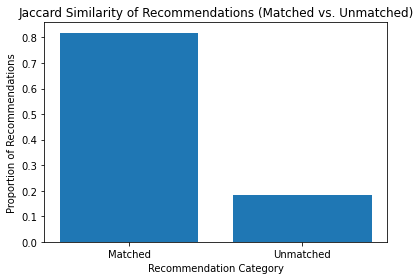

In [114]:
import matplotlib.pyplot as plt
def visualize_jaccard_similarity(jaccard_score):
  """
  Creates a simple bar chart to visualize Jaccard similarity.

  Args:
    jaccard_score: A float value between 0 and 1 representing the Jaccard similarity.
  """

  # Separate values for the stacked bar (matched and unmatched recommendations)
  matched_recommendations = jaccard_score
  unmatched_recommendations = 1 - jaccard_score

  # Create the stacked bar chart
  x = ['Matched', 'Unmatched']
  bar1 = plt.bar(x, [matched_recommendations, unmatched_recommendations])
  plt.xlabel("Recommendation Category")
  plt.ylabel("Proportion of Recommendations")
  plt.title("Jaccard Similarity of Recommendations (Matched vs. Unmatched)")
  #plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


visualize_jaccard_similarity(jaccardscore)





#### Hence,the two recommendation methods recommend mostly same movies, but there's also a noticeable difference in their suggestions.
